## 動作確認

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install numpy==1.25.2
# !pip install matplotlib==3.7.1
# !pip install scikit-learn==1.2.2

In [23]:
# ライブラリのインポート
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [9]:
# バージョンの確認
import matplotlib
import sklearn
print(np.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)

1.25.2
3.7.1
1.2.2


In [10]:
# 特徴量の次数は1次、2次元配列を作成
X = [[2]]
# 特徴量の次数を6次に変換
poly = PolynomialFeatures(degree=6, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

X_poly

array([[ 2.,  4.,  8., 16., 32., 64.]])

## sin関数

In [32]:
# sin関数にノイズを追加して訓練データ(X,y)を作成
np.random.seed(seed=8) #乱数を固定
# 1次元配列を2次元配列に変換
X = np.random.uniform(0, 4, 15)[:, np.newaxis]
# 2次元配列を1次元配列に変換
y = np.sin(1/2 * np.pi * X ).flatten() + np.random.normal(0, 0.3, 15)

# 次数を指定
degree = 6

# 特徴量の多項式変換
poly = PolynomialFeatures(degree = degree, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

In [33]:
X[0]

array([3.49371761])

In [34]:
X_poly[0]

array([   3.49371761,   12.20606275,   42.64453638,  148.98796777,
        520.52188686, 1818.55648313])

In [12]:
from sklearn.linear_model import LinearRegression

# 線形回帰モデルを作成
model = LinearRegression()

# 多項式変換した特徴量と正解値で学習
model.fit(X_poly, y)

LinearRegression()

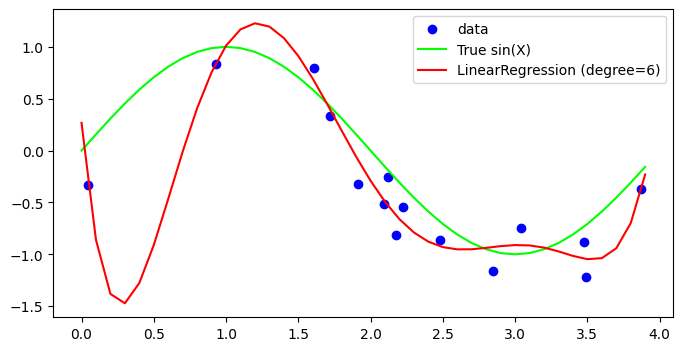

In [19]:
plt.figure(figsize=(8, 4)) #プロットのサイズ指定

# プロット用にデータX_pltを作成し2次元に変換
X_plt = np.arange(0, 4, 0.1)[:, np.newaxis]
# 正解値のプロット、1次元に変換
y_true = np.sin(1/2 * np.pi * X_plt).flatten()
# 予測値のプロット、1次元で出力
y_pred = model.predict(poly.transform(X_plt))

# 線形回帰の予測値
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_true, color='lime', linestyle='-', label='True sin(X)')
plt.plot(X_plt, y_pred, color='red', linestyle='-', label=f'LinearRegression (degree={degree})')
plt.legend(loc='upper right')

plt.show()

In [20]:
X_plt

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9]])

In [21]:
y_true

array([ 0.00000000e+00,  1.56434465e-01,  3.09016994e-01,  4.53990500e-01,
        5.87785252e-01,  7.07106781e-01,  8.09016994e-01,  8.91006524e-01,
        9.51056516e-01,  9.87688341e-01,  1.00000000e+00,  9.87688341e-01,
        9.51056516e-01,  8.91006524e-01,  8.09016994e-01,  7.07106781e-01,
        5.87785252e-01,  4.53990500e-01,  3.09016994e-01,  1.56434465e-01,
        1.22464680e-16, -1.56434465e-01, -3.09016994e-01, -4.53990500e-01,
       -5.87785252e-01, -7.07106781e-01, -8.09016994e-01, -8.91006524e-01,
       -9.51056516e-01, -9.87688341e-01, -1.00000000e+00, -9.87688341e-01,
       -9.51056516e-01, -8.91006524e-01, -8.09016994e-01, -7.07106781e-01,
       -5.87785252e-01, -4.53990500e-01, -3.09016994e-01, -1.56434465e-01])

In [22]:
y_pred

array([ 0.26711146, -0.86078894, -1.3813548 , -1.47152372, -1.27589071,
       -0.91030482, -0.4652755 , -0.00918848,  0.40866865,  0.75527119,
        1.01121252,  1.1682496 ,  1.22703885,  1.19506236,  1.08474453,
        0.911759  ,  0.69352598,  0.44789995,  0.19204769, -0.05848332,
       -0.29050608, -0.49374501, -0.66119639, -0.78929853, -0.87791156,
       -0.93010682, -0.95176596, -0.95098957, -0.93731559, -0.9207472 ,
       -0.9105905 , -0.9141017 , -0.93494405, -0.97145431, -1.01471896,
       -1.04645998, -1.03673027, -0.94141874, -0.699565  , -0.23048377])

## Ridge回帰

In [24]:
from sklearn.linear_model import Ridge

# 正則化の強さを指定
alpha=0.1

model2 = Ridge(alpha=alpha)

# 多項式変換した特徴量と正解値で学習
model2.fit(X_poly, y)

Ridge(alpha=0.1)

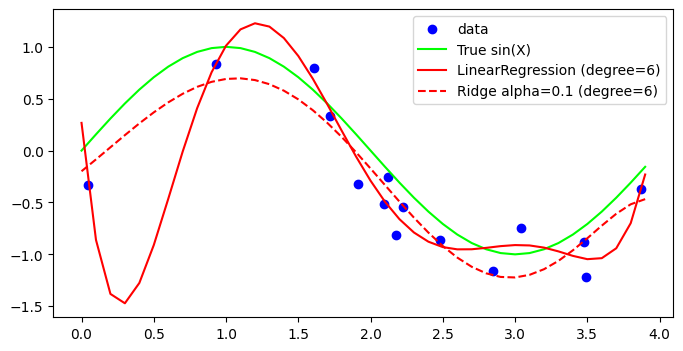

In [26]:
plt.figure(figsize=(8, 4)) #プロットのサイズ指定

# プロット用にデータX_pltを作成し2次元に変換
X_plt = np.arange(0, 4, 0.1)[:, np.newaxis]
# 正解値のプロット、1次元に変換
y_true = np.sin(1/2 * np.pi * X_plt).flatten()
# 予測値のプロット、1次元で出力
y_pred = model.predict(poly.transform(X_plt))
# 予測値のプロット、1次元で出力
y_pred2 = model2.predict(poly.transform(X_plt))

# 線形回帰とRidge回帰の予測値の比較
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_true, color='lime', linestyle='-' ,label='True sin(X)')
plt.plot(X_plt, y_pred, color='red', linestyle='-' ,label=f'LinearRegression (degree={degree})')
plt.plot(X_plt, y_pred2, color='red', linestyle='--' ,label=f'Ridge alpha={alpha} (degree={degree})')
plt.legend(loc='upper right')

plt.show()